In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Observation
This is our training dataset which have 31647 rows and 18 columns.

Subscribed column is our target variable which is a categorical column with two classes. So this is our binary classification problem. Rest all are our features. 

In [3]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Observation
This is our Test data which we will use while prediction

In [4]:
df.shape

(31647, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Observation
1.Column job,marital,education,default,housing,loan,contact,month,poutcome have dtype object and are catg column.

2.Column id ,age,balance,day,duration,campaign,pdays,previous have dtype int and have discrete data.

3.There are no nulls in our dataset.

4.In my opinion Id column have no impact on our target column so we can drop it off. 

In [6]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Observation
1.There are no nulls in our dataset.

2.Age,Balance,duration,campaign,pdays have data which is right skewed.

3.All columns seems to have outliers.

4.in my opinion i will not remove ouliers from day column bcoz 31 days is acceptable

In [7]:
#let's drop id column
df.drop('ID',axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [8]:
#let's drop duplicates if any
df.drop_duplicates(inplace=True)
df.shape

(31647, 17)

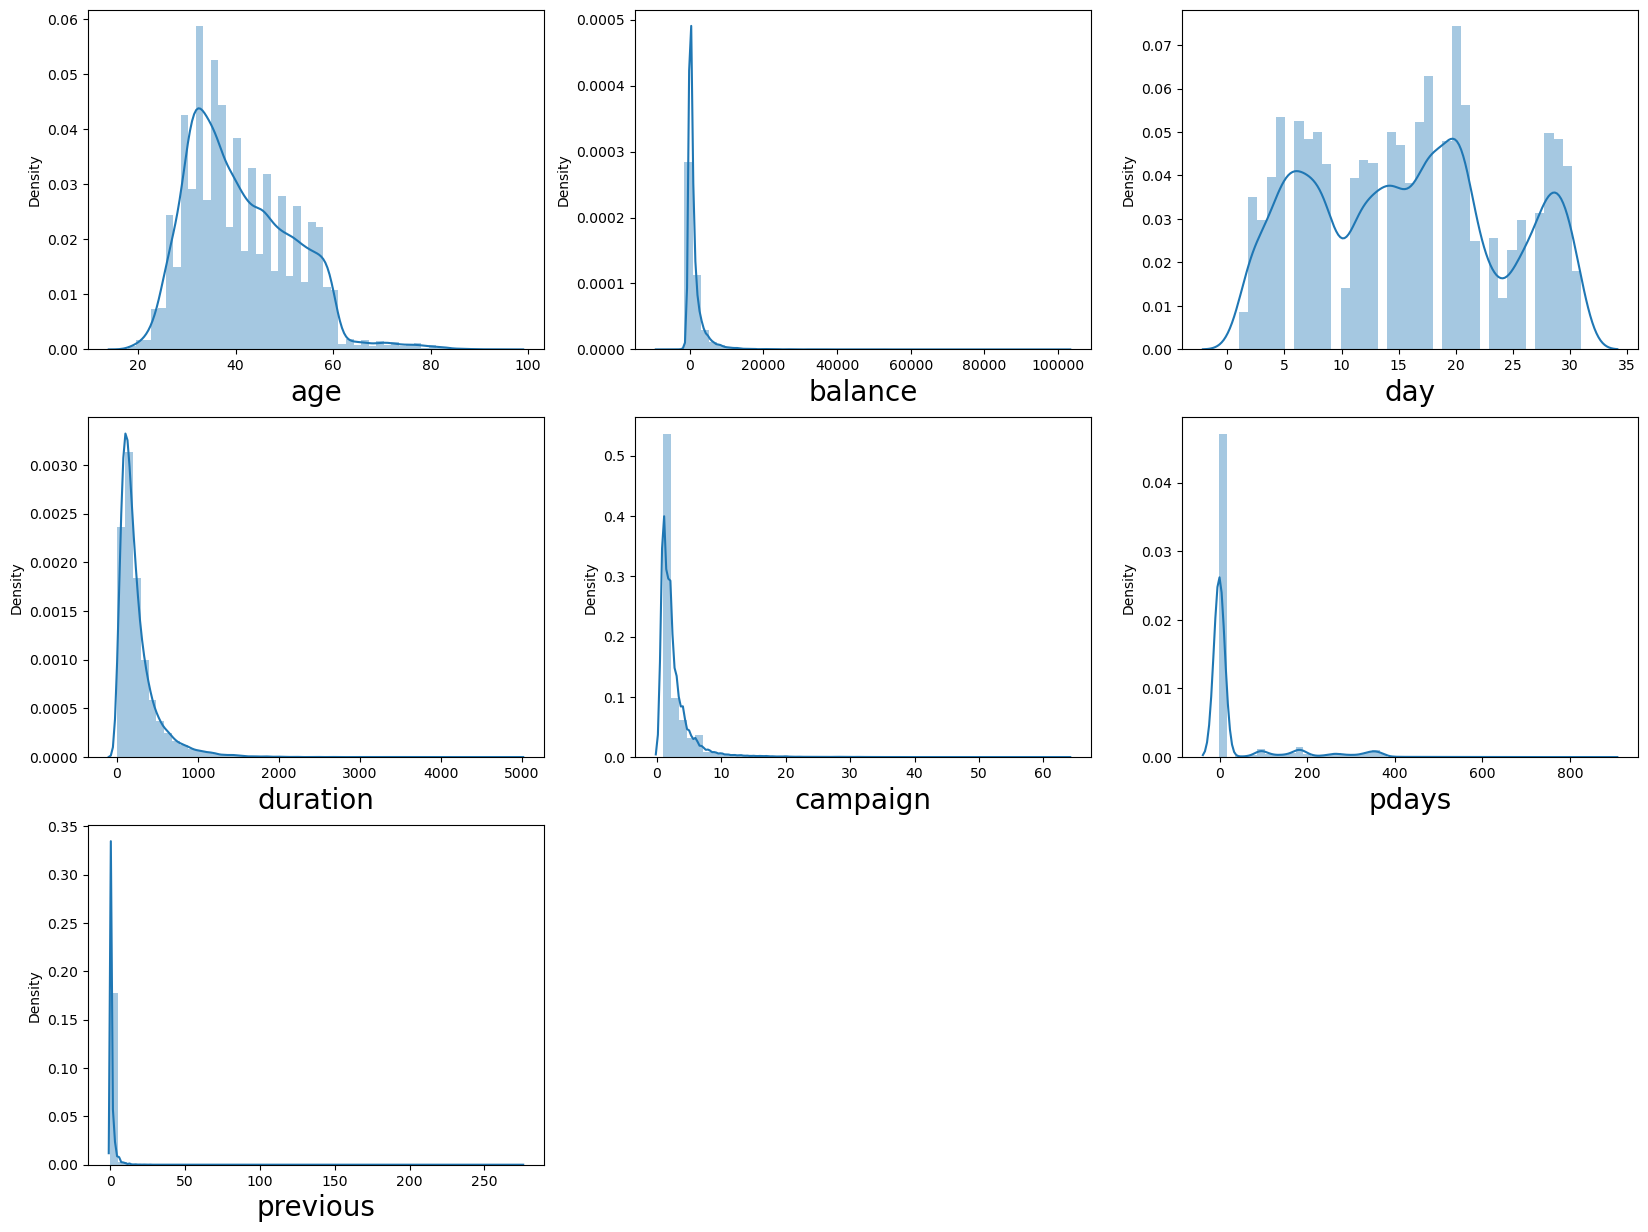

In [9]:
#lets build distplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
Data distribution seems good but all columns have some outliers except day column

Let's plot box plot to check outliers

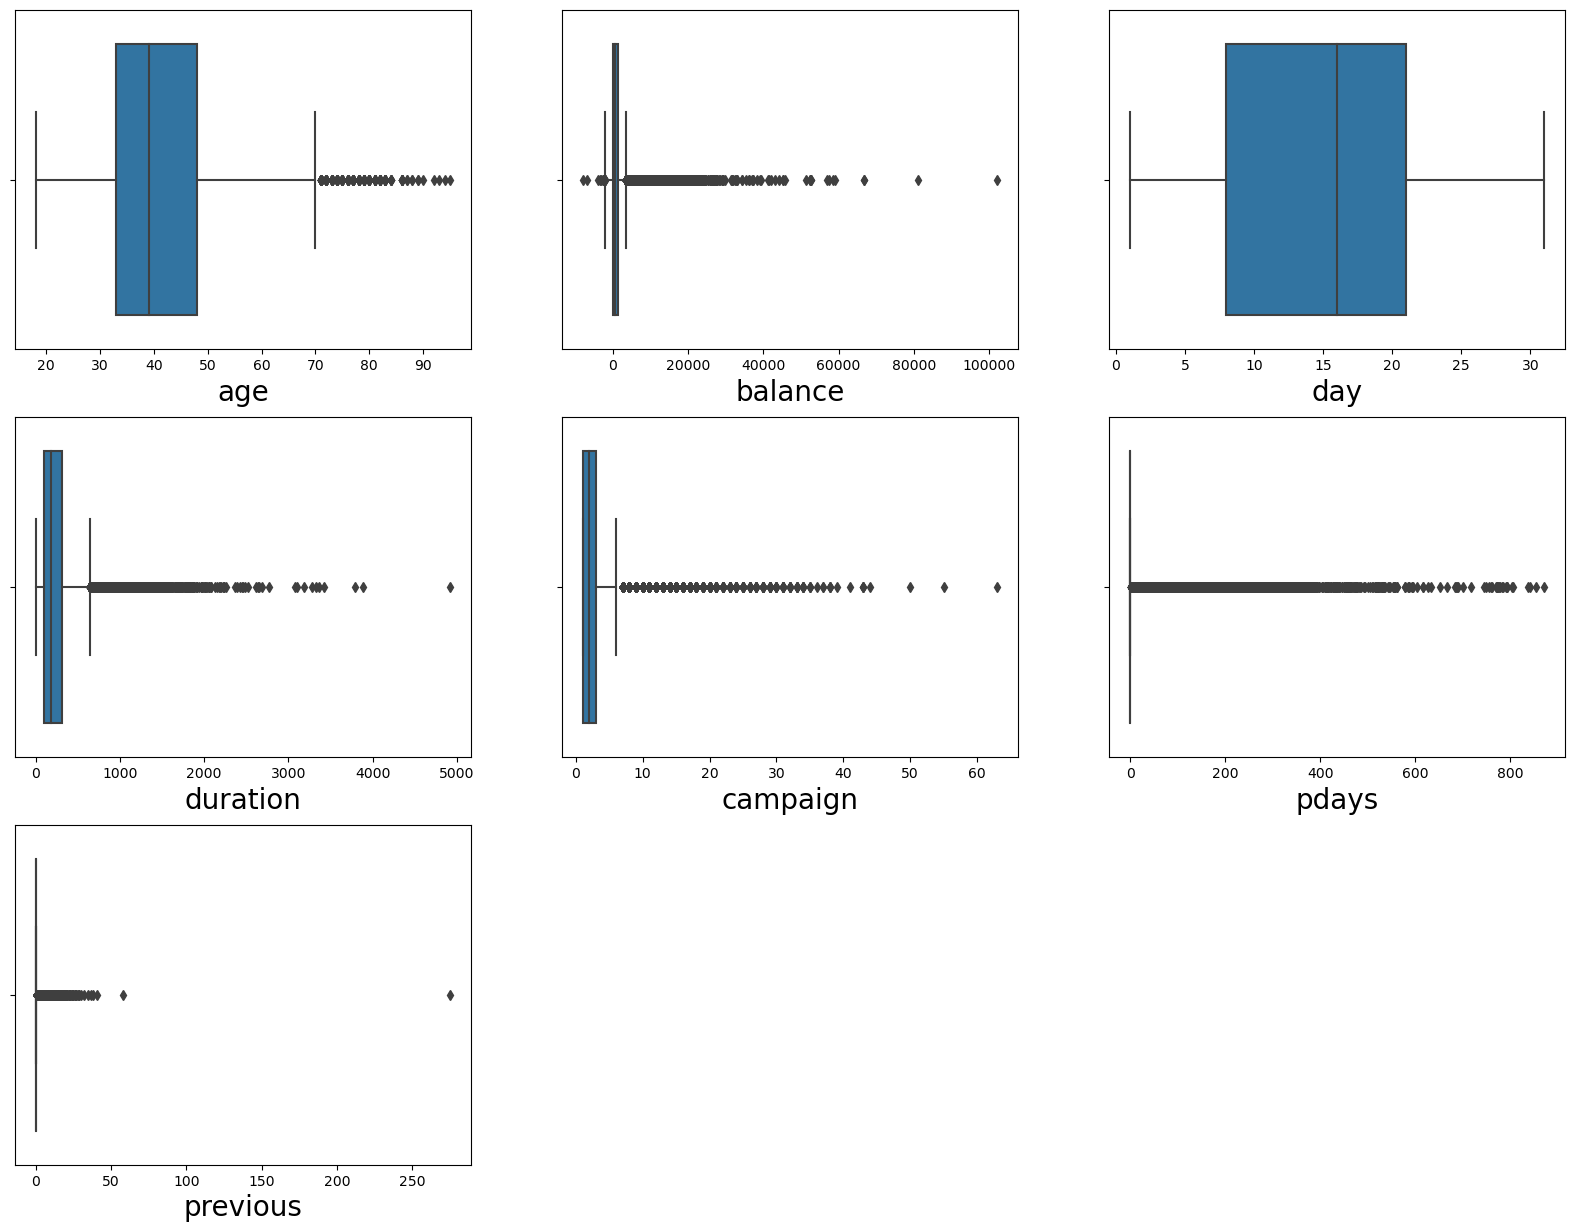

In [10]:
#lets build boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
Except day column ,all columns have huge outliers.

In [11]:
df['pdays'].value_counts()

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

# Observation
There is something fishy in pdays column bcoz it represents no of days passed by and it can't be negative.

We will see to it.

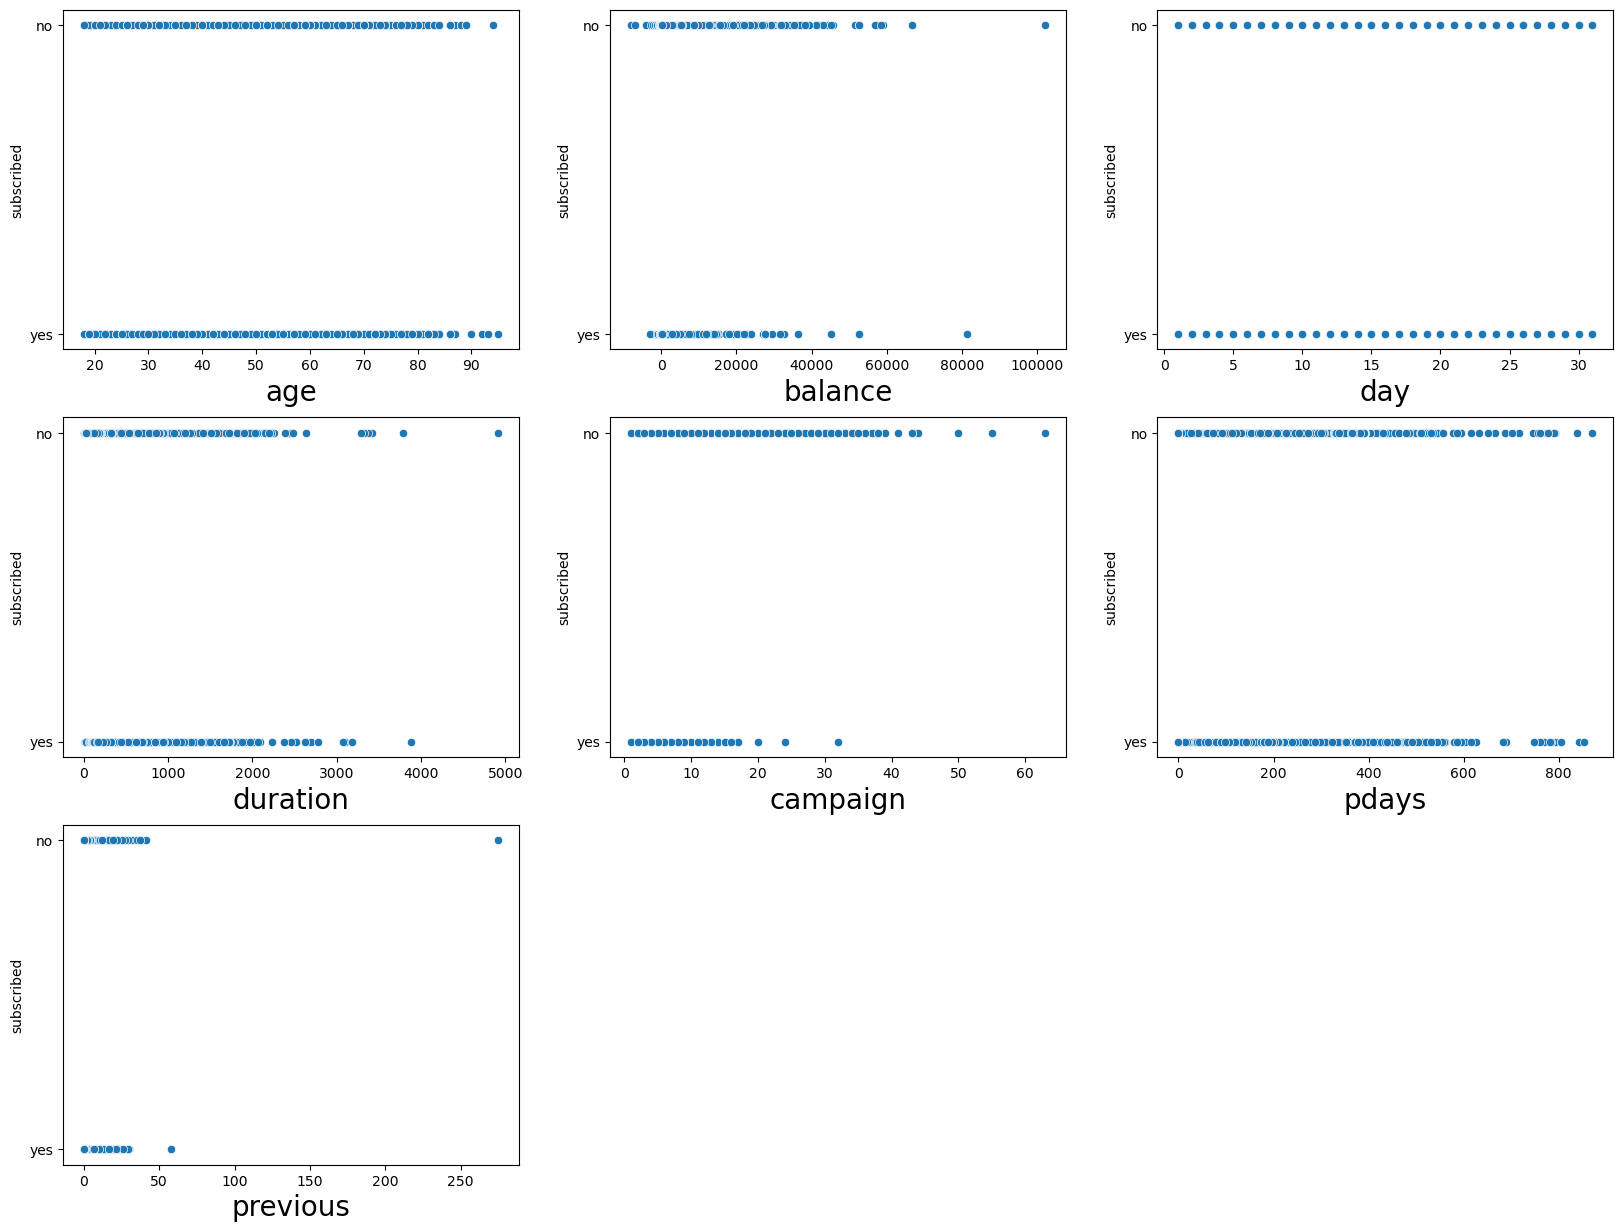

In [12]:
#lets build scatterplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=df[col],y=df['subscribed'],data=df)
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# All our columns are showing some sort of relation with our target variable

# Observation
Let's check for skewness and reduce if any

In [13]:
df.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [14]:
#lets use cube root method
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])
df['balance']=np.cbrt(df['balance'])
df['age']=np.cbrt(df['age'])

In [15]:
df.skew()

age         0.286363
balance    -0.086014
day         0.087185
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64

# Observation
Results are good i.e skewness is reduced to some level but let's try another method 

Let's try square root method


In [16]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [17]:
df1.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [18]:
#Let's use square root method
df1['balance']=np.sqrt(df1['balance'])
df1['duration']=np.sqrt(df1['duration'])
df1['campaign']=np.sqrt(df1['campaign'])
df1['pdays']=np.sqrt(df1['pdays'])
df1['previous']=np.sqrt(df1['previous'])
df1['age']=np.sqrt(df1['age'])

In [19]:
df1.skew()

ID          0.005851
age         0.381346
balance     1.886565
day         0.087185
duration    1.179872
campaign    2.225079
pdays      -0.288665
previous    2.979019
dtype: float64

# Observation
Skewness is reduced but not as good as in cube root method

Let's try log transformation method

In [20]:
df2=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [21]:
df2.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [22]:
#Let's use log transformation method
#Lets impute 0 with their mean
df2['balance']=df2['balance'].replace(0,df2['balance'].mean())
df2['duration']=df2['duration'].replace(0,df2['duration'].mean())
df2['pdays']=df2['pdays'].replace(0,df2['pdays'].mean())
df2['previous']=df2['previous'].replace(0,df2['previous'].mean())


In [23]:
#Lets transform using log method
df2['age']=np.log(df2['age'])
df2['balance']=np.log(df2['balance'])
df2['duration']=np.log(df2['duration'])
df2['campaign']=np.log(df2['campaign'])
df2['pdays']=np.log(df2['pdays'])
df2['previous']=np.log(df2['previous'])


In [24]:
df2.skew()

ID          0.005851
age         0.100209
balance    -0.897219
day         0.087185
duration   -0.485337
campaign    0.887244
pdays      -2.578887
previous    2.734994
dtype: float64

# Observation
Skewness is reduced but let's check powertransformer tech

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
df3=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df3

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [27]:
features=['age','balance','duration','campaign','pdays','previous']
scale=PowerTransformer()

In [28]:
df3[features]=scale.fit_transform(df3[features].values)

In [29]:
df3.skew()

ID          0.005851
age         0.008940
balance     0.821075
day         0.087185
duration    0.017331
campaign    0.230683
pdays       1.660825
previous    1.661485
dtype: float64

# Observation
After applying all the transformation technique we can see that power transformation tech is doing good so i will proceed with that data only.

Now lets remove outliers

In [30]:
df3.drop('ID',axis=1,inplace=True)
df3.shape

(31647, 17)

In [31]:
from scipy.stats import zscore

In [32]:
col=df3[['age','duration','balance','campaign','pdays','previous']]
z_score=np.abs(zscore(col))
z_score

,age,duration,balance,campaign,pdays,previous
0,1.341382,1.443825,0.340062,0.135025,0.469696,0.469673
1,0.966378,0.751296,0.432502,0.135025,0.469696,0.469673
2,1.538153,0.290005,0.031475,1.109239,0.469696,0.469673
3,1.406955,1.895948,0.776856,1.109239,2.105039,2.177812
4,0.966378,0.833299,0.361739,1.109239,0.469696,0.469673
...,...,...,...,...,...,...
31642,1.240871,0.503544,0.435463,0.135025,0.469696,0.469673
31643,1.136104,1.008101,0.238544,0.135025,0.469696,0.469673
31644,0.836711,1.598288,0.268747,0.738582,0.469696,0.469673
31645,1.406955,2.037314,0.308996,1.609201,2.150844,2.186083


In [33]:
np.where(z_score>3)

(array([   26,   109,   149,   268,   403,   418,   497,   597,   609,
          618,   666,   694,   706,   746,   751,   753,   756,   848,
          896,   956,  1002,  1039,  1089,  1139,  1240,  1392,  1398,
         1423,  1431,  1462,  1482,  1539,  1602,  1606,  1710,  1719,
         1806,  1821,  1822,  1830,  1891,  1924,  1969,  1975,  2023,
         2080,  2083,  2137,  2142,  2342,  2399,  2450,  2577,  2599,
         2599,  2611,  2654,  2698,  2718,  2748,  2794,  2802,  2805,
         2913,  2925,  2949,  2977,  3006,  3031,  3139,  3209,  3488,
         3530,  3575,  3760,  3867,  3904,  3946,  3979,  4009,  4020,
         4024,  4066,  4173,  4239,  4245,  4255,  4284,  4331,  4393,
         4411,  4441,  4464,  4494,  4523,  4541,  4548,  4571,  4601,
         4606,  4612,  4679,  4713,  4725,  4727,  4741,  4767,  4789,
         4823,  4837,  4918,  4920,  4964,  5128,  5159,  5173,  5189,
         5194,  5414,  5440,  5447,  5463,  5491,  5593,  5708,  5725,
      

In [34]:
df4=df3[(z_score<3).all(axis=1)]
df4.shape

(30923, 17)

In [35]:
#let's check for dataloss
print('Data loss is :',((df3.shape[0]-df4.shape[0])/df3.shape[0])*100)

Data loss is : 2.2877365943059376


# Observation
All outliers r removed and dataloss is also fine so let's plot and see

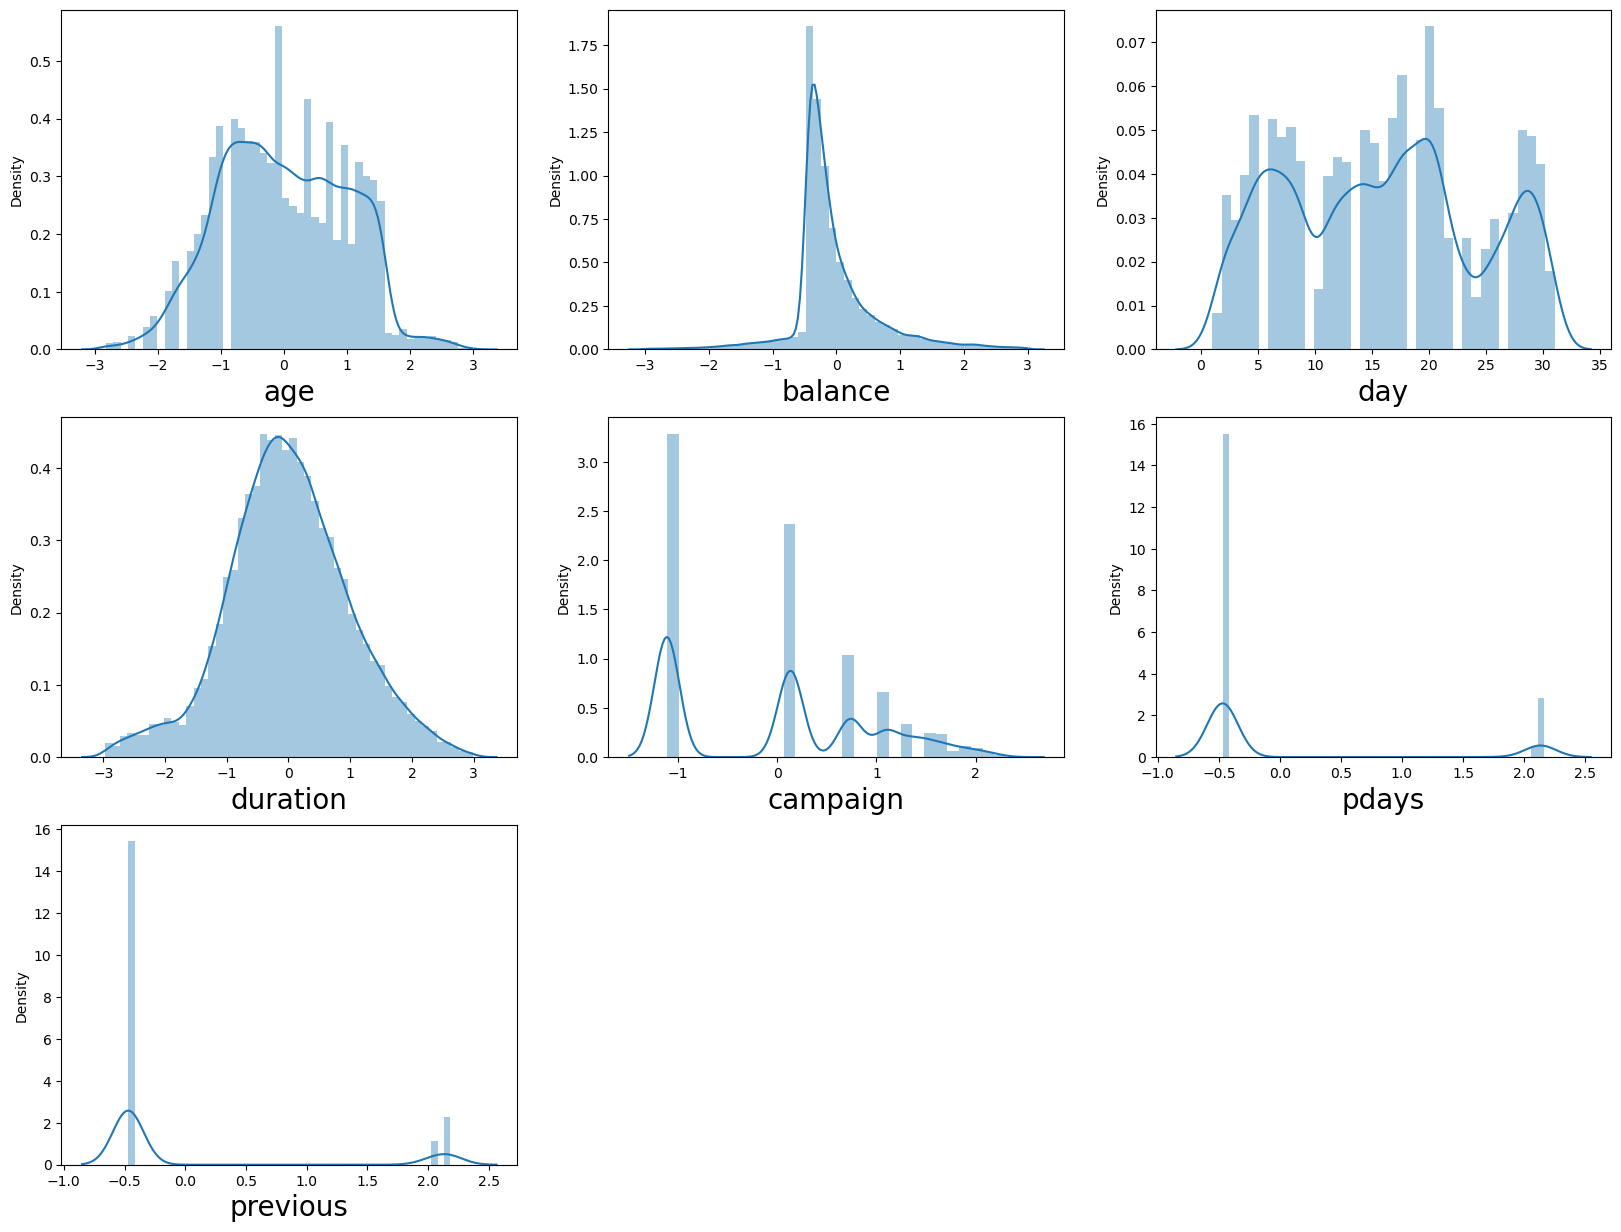

In [36]:
#lets build distplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df4[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df4[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

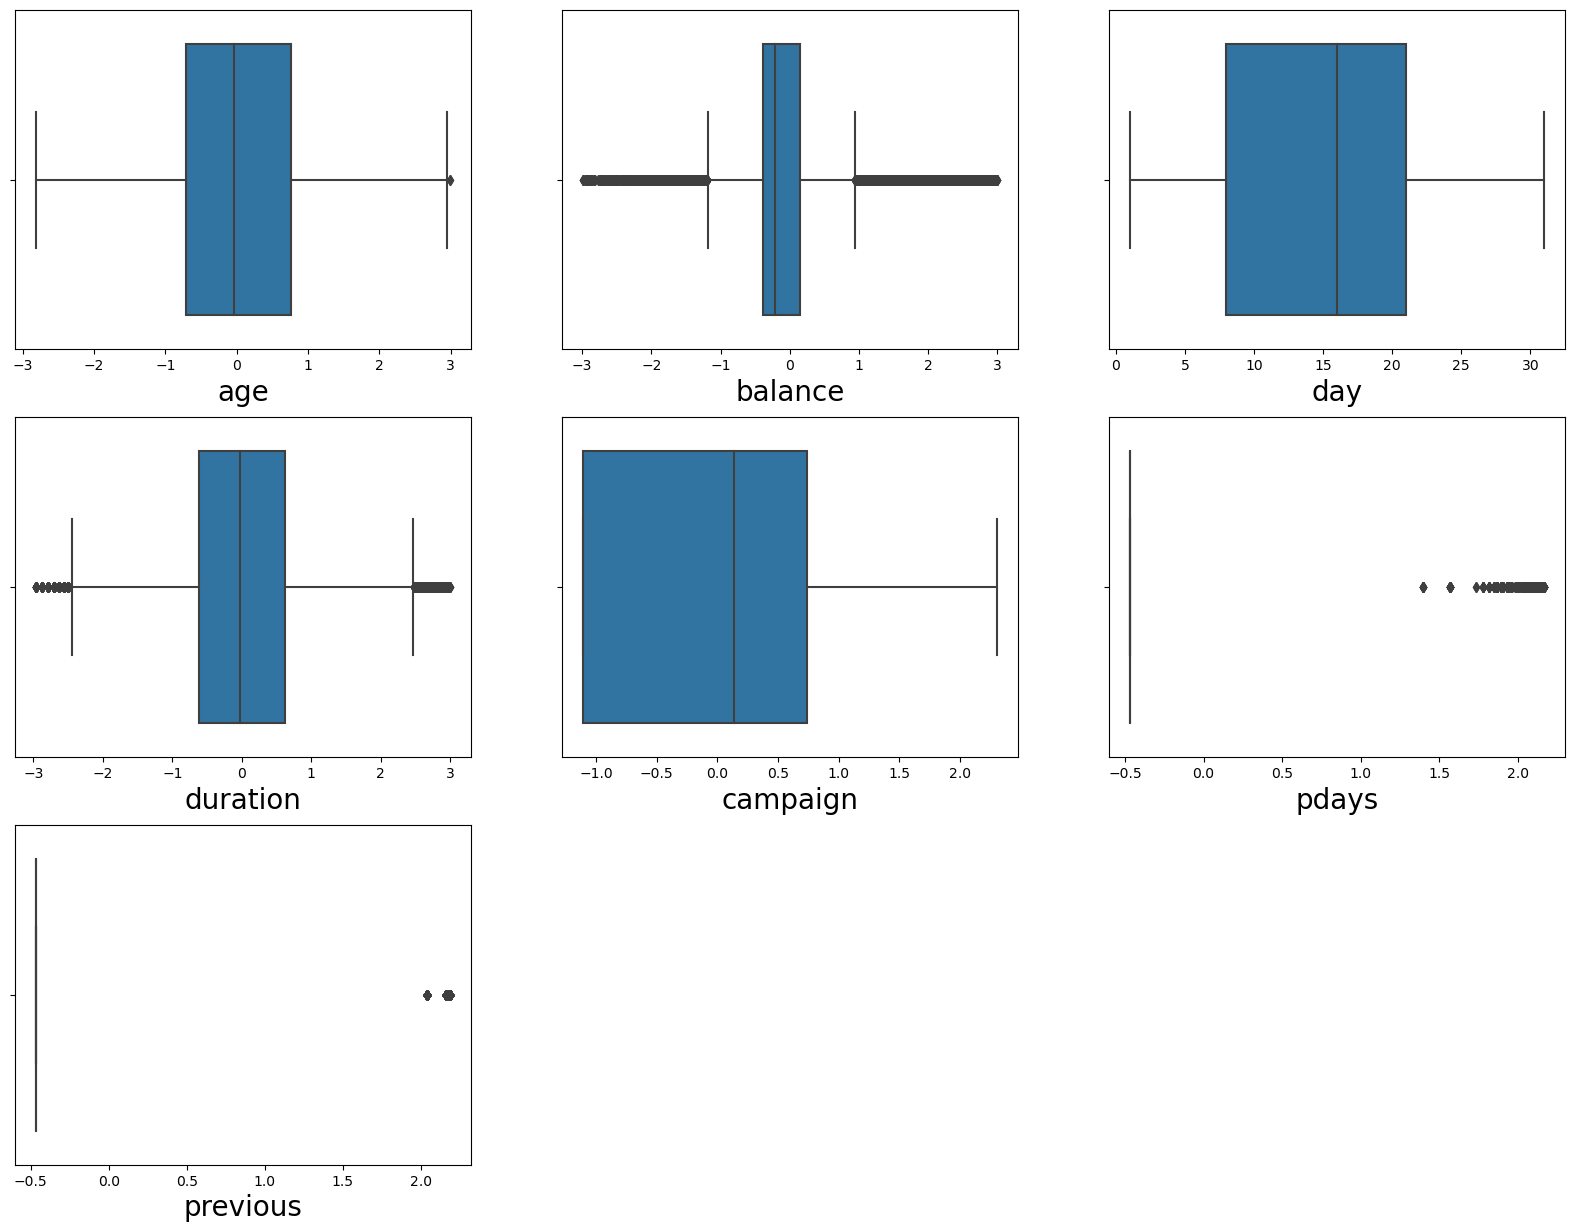

In [37]:
#lets build boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df4[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df4[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

In [38]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [39]:
for col in df4.columns:
    if df4[col].dtype == object:
        label = LabelEncoder()
        df4[col] = label.fit_transform(df4[col])

# Observation
Let's plot heat map to check multicollinearity problem

In [40]:
corr=df4.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.028873,-0.430104,-0.100844,-0.013608,0.097362,-0.159301,-0.005765,0.034443,-0.007679,-0.040964,-0.022163,0.036121,-0.006663,-0.005790,0.008185,0.000647
job,-0.028873,1.000000,0.065626,0.171151,-0.005010,0.032033,-0.125658,-0.039566,-0.077734,0.022176,-0.090625,0.001424,0.009352,-0.000231,0.000292,0.007255,0.037408
marital,-0.430104,0.065626,1.000000,0.109454,-0.009637,0.015966,-0.016416,-0.039991,-0.039573,-0.007117,-0.002921,0.013266,-0.030762,0.026202,0.026189,-0.018376,0.044084
education,-0.100844,0.171151,0.109454,1.000000,-0.005403,0.064683,-0.096686,-0.045999,-0.111527,0.018748,-0.058238,0.003747,-0.008680,0.032034,0.032644,-0.018325,0.066625
default,-0.013608,-0.005010,-0.009637,-0.005403,1.000000,-0.139382,-0.017915,0.078301,0.009559,0.009453,0.001348,-0.009590,0.017137,-0.037994,-0.038212,0.033915,-0.018935
balance,0.097362,0.032033,0.015966,0.064683,-0.139382,1.000000,-0.087761,-0.126893,-0.042358,-0.001103,0.007548,0.033124,-0.025122,0.056422,0.056593,-0.042408,0.084458
housing,-0.159301,-0.125658,-0.016416,-0.096686,-0.017915,-0.087761,1.000000,0.033776,0.196136,-0.028465,0.273170,0.001456,-0.038567,0.058549,0.056626,-0.093438,-0.141389
loan,-0.005765,-0.039566,-0.039991,-0.045999,0.078301,-0.126893,0.033776,1.000000,-0.008606,0.014199,0.024239,-0.008592,0.003945,-0.025731,-0.025769,0.009190,-0.071697
contact,0.034443,-0.077734,-0.039573,-0.111527,0.009559,-0.042358,0.196136,-0.008606,1.000000,-0.028975,0.365657,-0.036521,0.005378,-0.288968,-0.288797,0.272934,-0.150295
day,-0.007679,0.022176,-0.007117,0.018748,0.009453,-0.001103,-0.028465,0.014199,-0.028975,1.000000,-0.003967,-0.057158,0.144805,-0.080366,-0.080275,0.077750,-0.029190


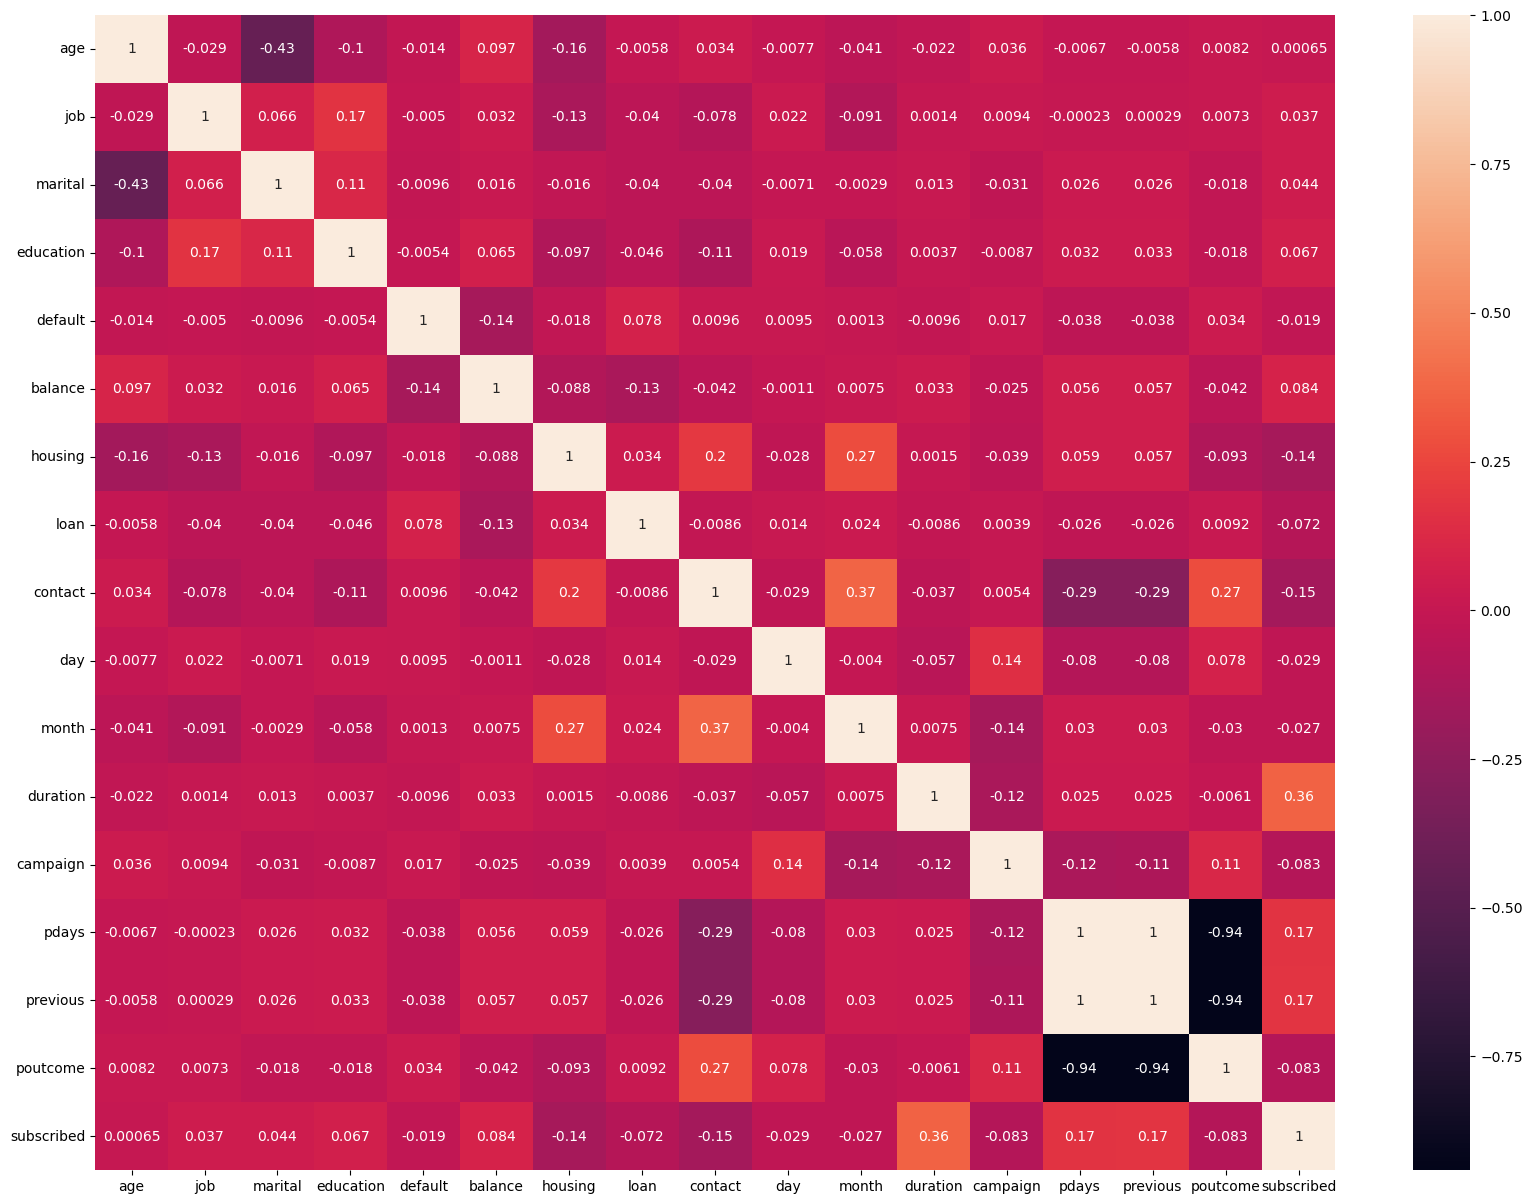

In [41]:
#Let's plot heatmap for visualisation purpose
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.Age column is very less in relation with our label.

2.Job,Marital,Education,Balance,duration,pdays,previous are in positive corelation with our label

3.housing ,default,loan,contact,day,month,campaign,poutcome are in negative corelation with our label.

4.previous and pdays are in 100% corelation.

5.poutcome and pdays,poutcome and previous have high negative corelation

6.month and housing,month and contact are in positive corelation

7.We can observe other relation as well

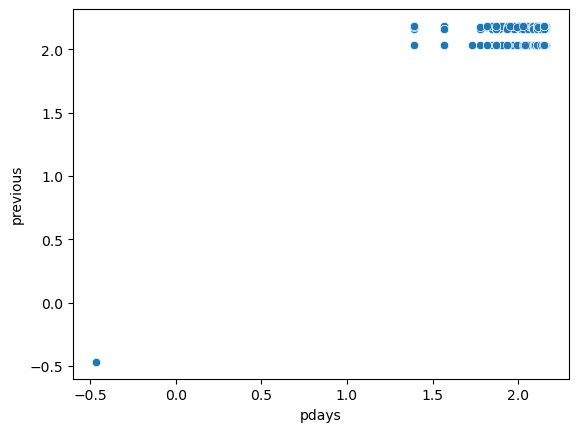

In [42]:
sns.scatterplot(x=df4['pdays'],y=df4['previous'],data=df4)
plt.show()

# Observation
We can clearly see here that pdays and previous are highly corelated .So we can drop one of them

In [43]:
df4.drop('pdays',axis=1,inplace=True)
df4.shape

(30923, 16)

In [44]:
df4.drop('subscribed',axis=1).corrwith(df4.subscribed)

age          0.000647
job          0.037408
marital      0.044084
education    0.066625
default     -0.018935
balance      0.084458
housing     -0.141389
loan        -0.071697
contact     -0.150295
day         -0.029190
month       -0.026715
duration     0.358336
campaign    -0.083418
previous     0.173675
poutcome    -0.082575
dtype: float64

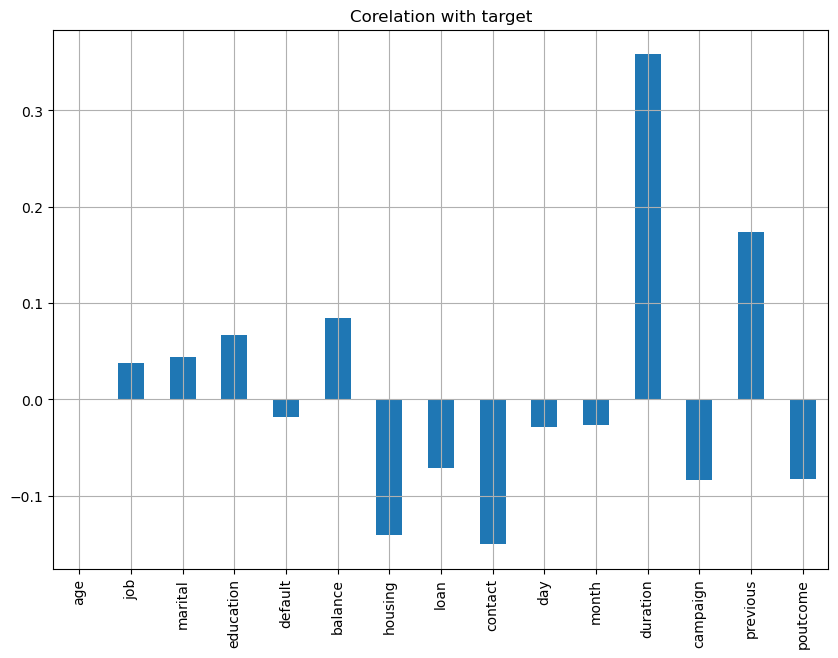

In [45]:
df4.drop('subscribed',axis=1).corrwith(df4.subscribed).plot(kind='bar',grid=True,figsize=(10,7),title="Corelation with target")
plt.show()

# Observation 
Age column is not showing any relation with our label so we can drop it off

In [46]:
df4.drop('age',axis=1,inplace=True)
df4.shape

(30923, 15)

In [47]:
#lets separate features and label
X=df4.drop('subscribed',axis=1)
y=df4['subscribed']

In [48]:
#let's standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [49]:
X_scaled

array([[-1.31884492, -0.27470832,  2.37831509, ...,  0.13382931,
        -0.47043822,  0.44256065],
       [ 2.03566785, -0.27470832, -0.29448028, ...,  0.13382931,
        -0.47043822,  0.44256065],
       [ 0.81584502, -0.27470832, -0.29448028, ..., -1.11064435,
        -0.47043822,  0.44256065],
       ...,
       [-0.0990221 , -1.92003182,  1.0419174 , ...,  0.13382931,
        -0.47043822,  0.44256065],
       [-0.0990221 ,  1.37061519,  1.0419174 , ...,  0.73748839,
        -0.47043822,  0.44256065],
       [ 1.42575644, -0.27470832, -0.29448028, ...,  1.6082536 ,
         2.18261269, -2.60765546]])

# Observation
Now our data is scaled

Let's check for multicollinearity issue using vif

In [50]:
X_scaled.shape

(30923, 14)

In [51]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']= X_scaled.columns
#let's check for value
vif

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Observation
1.VIF is used to check multicollinearity issue but i don't know why this code is not running.

2.Here i m not using feature selection tech because we already deleted 3 features.

3.Now let's check for classes in our label and if im balance let's balance them

In [52]:
y.value_counts()

0    27322
1     3601
Name: subscribed, dtype: int64

# Observation
our classes are imbalanced ,let's balance them using SMOTE method

In [53]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
x,Y=over.fit_resample(X_scaled,y)

In [54]:
Y.value_counts()

0    27322
1    27322
Name: subscribed, dtype: int64

In [55]:
x.shape

(54644, 14)

# Observation
Now our training data is all fixed i.e EDA part is completed on our train data.We can proceed ahead for modelling.

but before that let's perform all EDA part on our test data.

In [56]:
test.shape

(13564, 17)

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


# Observation
1.Our test data have 13564 rows and 17 columns.This is our test data so it dosen't have label.

2.There are no null values in our dataset.

3.Column id,age,balance,day,duration,campaign,pdays,previous have dtype int and have discrete data.

4.Rest all columns have object datatype

5.In my opinion id will not impact our label so i m dropping it

In [58]:
test.drop('ID',axis=1,inplace=True)

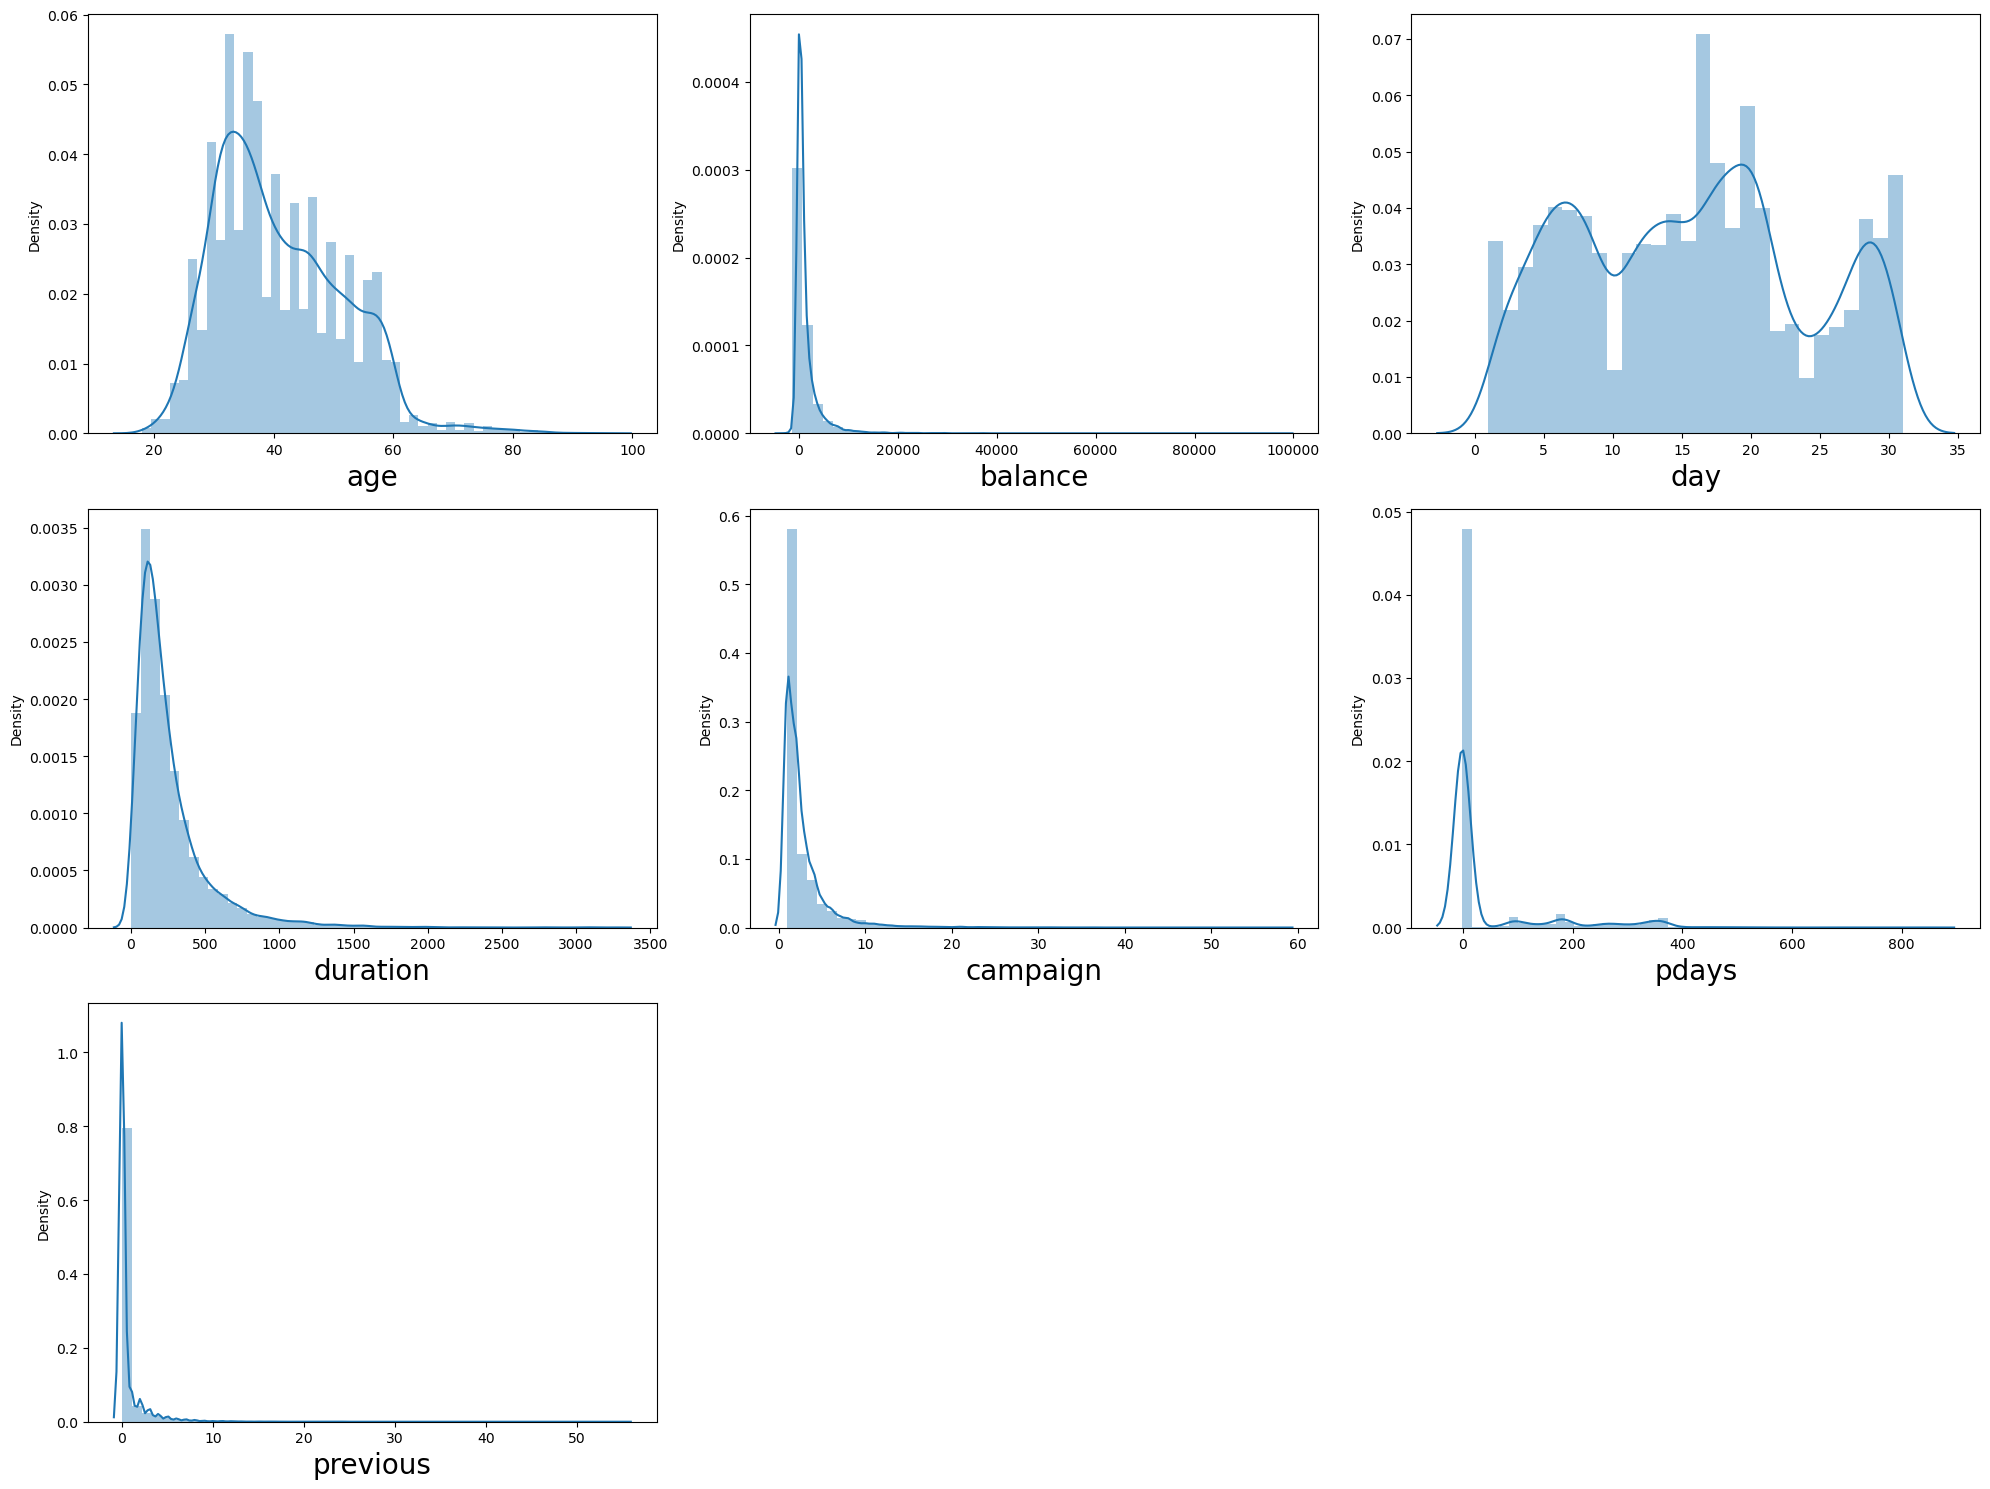

In [59]:
#lets see how data is distributed for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in test[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(test[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
Data distribution seems to be good but there are outliers in all columns.

But first let's remove skewness

In [60]:
test.drop_duplicates(inplace=True)
test.shape

(13564, 16)

In [61]:
test.skew()

age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

In [62]:
#Let's use powertranformer tech to reduce skewness
from sklearn.preprocessing import PowerTransformer
scalle=PowerTransformer()
featuress=['age','balance','duration','campaign','pdays','previous']
test[featuress]=scalle.fit_transform(test[featuress].values)


In [63]:
test.skew()

age         0.007857
balance     2.258038
day         0.106806
duration    0.019436
campaign    0.231562
pdays       1.609653
previous    1.610955
dtype: float64

# Observation
Skewness is reduced very much and approx is in our acceptable range

Now lets check for outliers

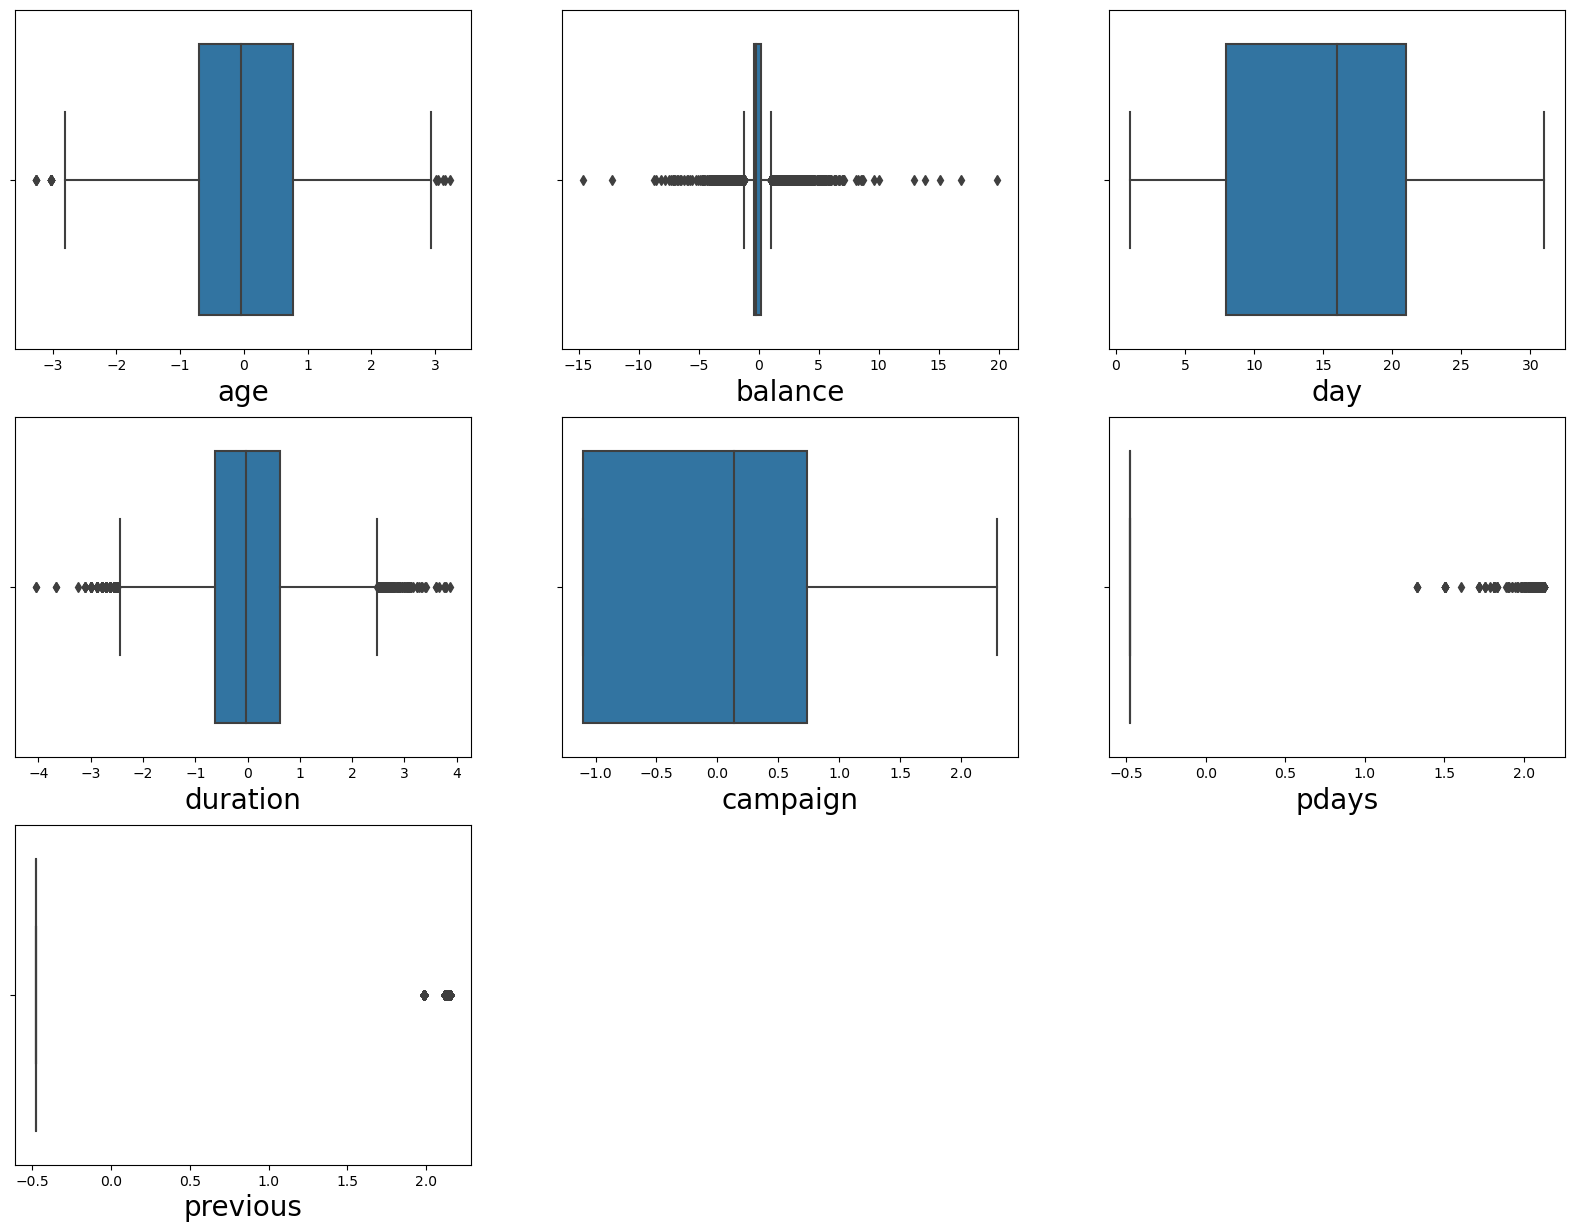

In [64]:
#lets build boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in test[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
Except day,campaign,duration column all r having outliers.

let's remove them using zscore method

In [65]:
from scipy.stats import zscore

In [66]:
coll=test[['age','balance','pdays','previous']]
z_scoree=np.abs(zscore(coll))
z_scoree

,age,balance,pdays,previous
0,0.830543,0.349877,0.479134,0.479073
1,2.549644,0.636076,0.479134,0.479073
2,0.959923,0.335968,0.479134,0.479073
3,1.414890,0.940270,0.479134,0.479073
4,0.520126,2.747632,0.479134,0.479073
...,...,...,...,...
13559,0.038159,0.392516,0.479134,0.479073
13560,1.213253,0.473571,0.479134,0.479073
13561,0.468654,0.266423,0.479134,0.479073
13562,1.233677,0.186352,2.063262,2.141219


In [67]:
np.where(z_scoree>3)

(array([   14,    26,    63,   121,   149,   186,   235,   287,   365,
          369,   423,   428,   431,   468,   474,   520,   548,   575,
          634,   702,   717,   732,   753,   763,   818,   949,  1069,
         1119,  1242,  1261,  1269,  1406,  1421,  1452,  1515,  1574,
         1575,  1605,  1609,  1628,  1637,  1705,  1839,  1858,  1873,
         1950,  2133,  2137,  2379,  2436,  2440,  2446,  2514,  2532,
         2633,  2653,  2687,  2705,  2766,  2812,  2845,  2873,  2941,
         2997,  3047,  3196,  3202,  3215,  3218,  3262,  3282,  3310,
         3318,  3374,  3447,  3555,  3582,  3714,  3777,  3806,  3918,
         3952,  4021,  4090,  4100,  4110,  4119,  4188,  4196,  4281,
         4310,  4368,  4436,  4460,  4484,  4516,  4654,  4660,  5004,
         5021,  5055,  5103,  5108,  5109,  5212,  5237,  5265,  5314,
         5374,  5386,  5446,  5465,  5467,  5480,  5532,  5559,  5612,
         5639,  5654,  5668,  5815,  5854,  5855,  5869,  5979,  6103,
      

In [68]:
testt=test[(z_scoree<3).all(axis=1)]
testt.shape

(13272, 16)

In [69]:
#let's check for dataloss
print('Data loss is :',((test.shape[0]-testt.shape[0])/test.shape[0])*100)

Data loss is : 2.152757298731937


# Observation 
Our dataloss is in our acceptable range.

Let's see dist plot and box plot

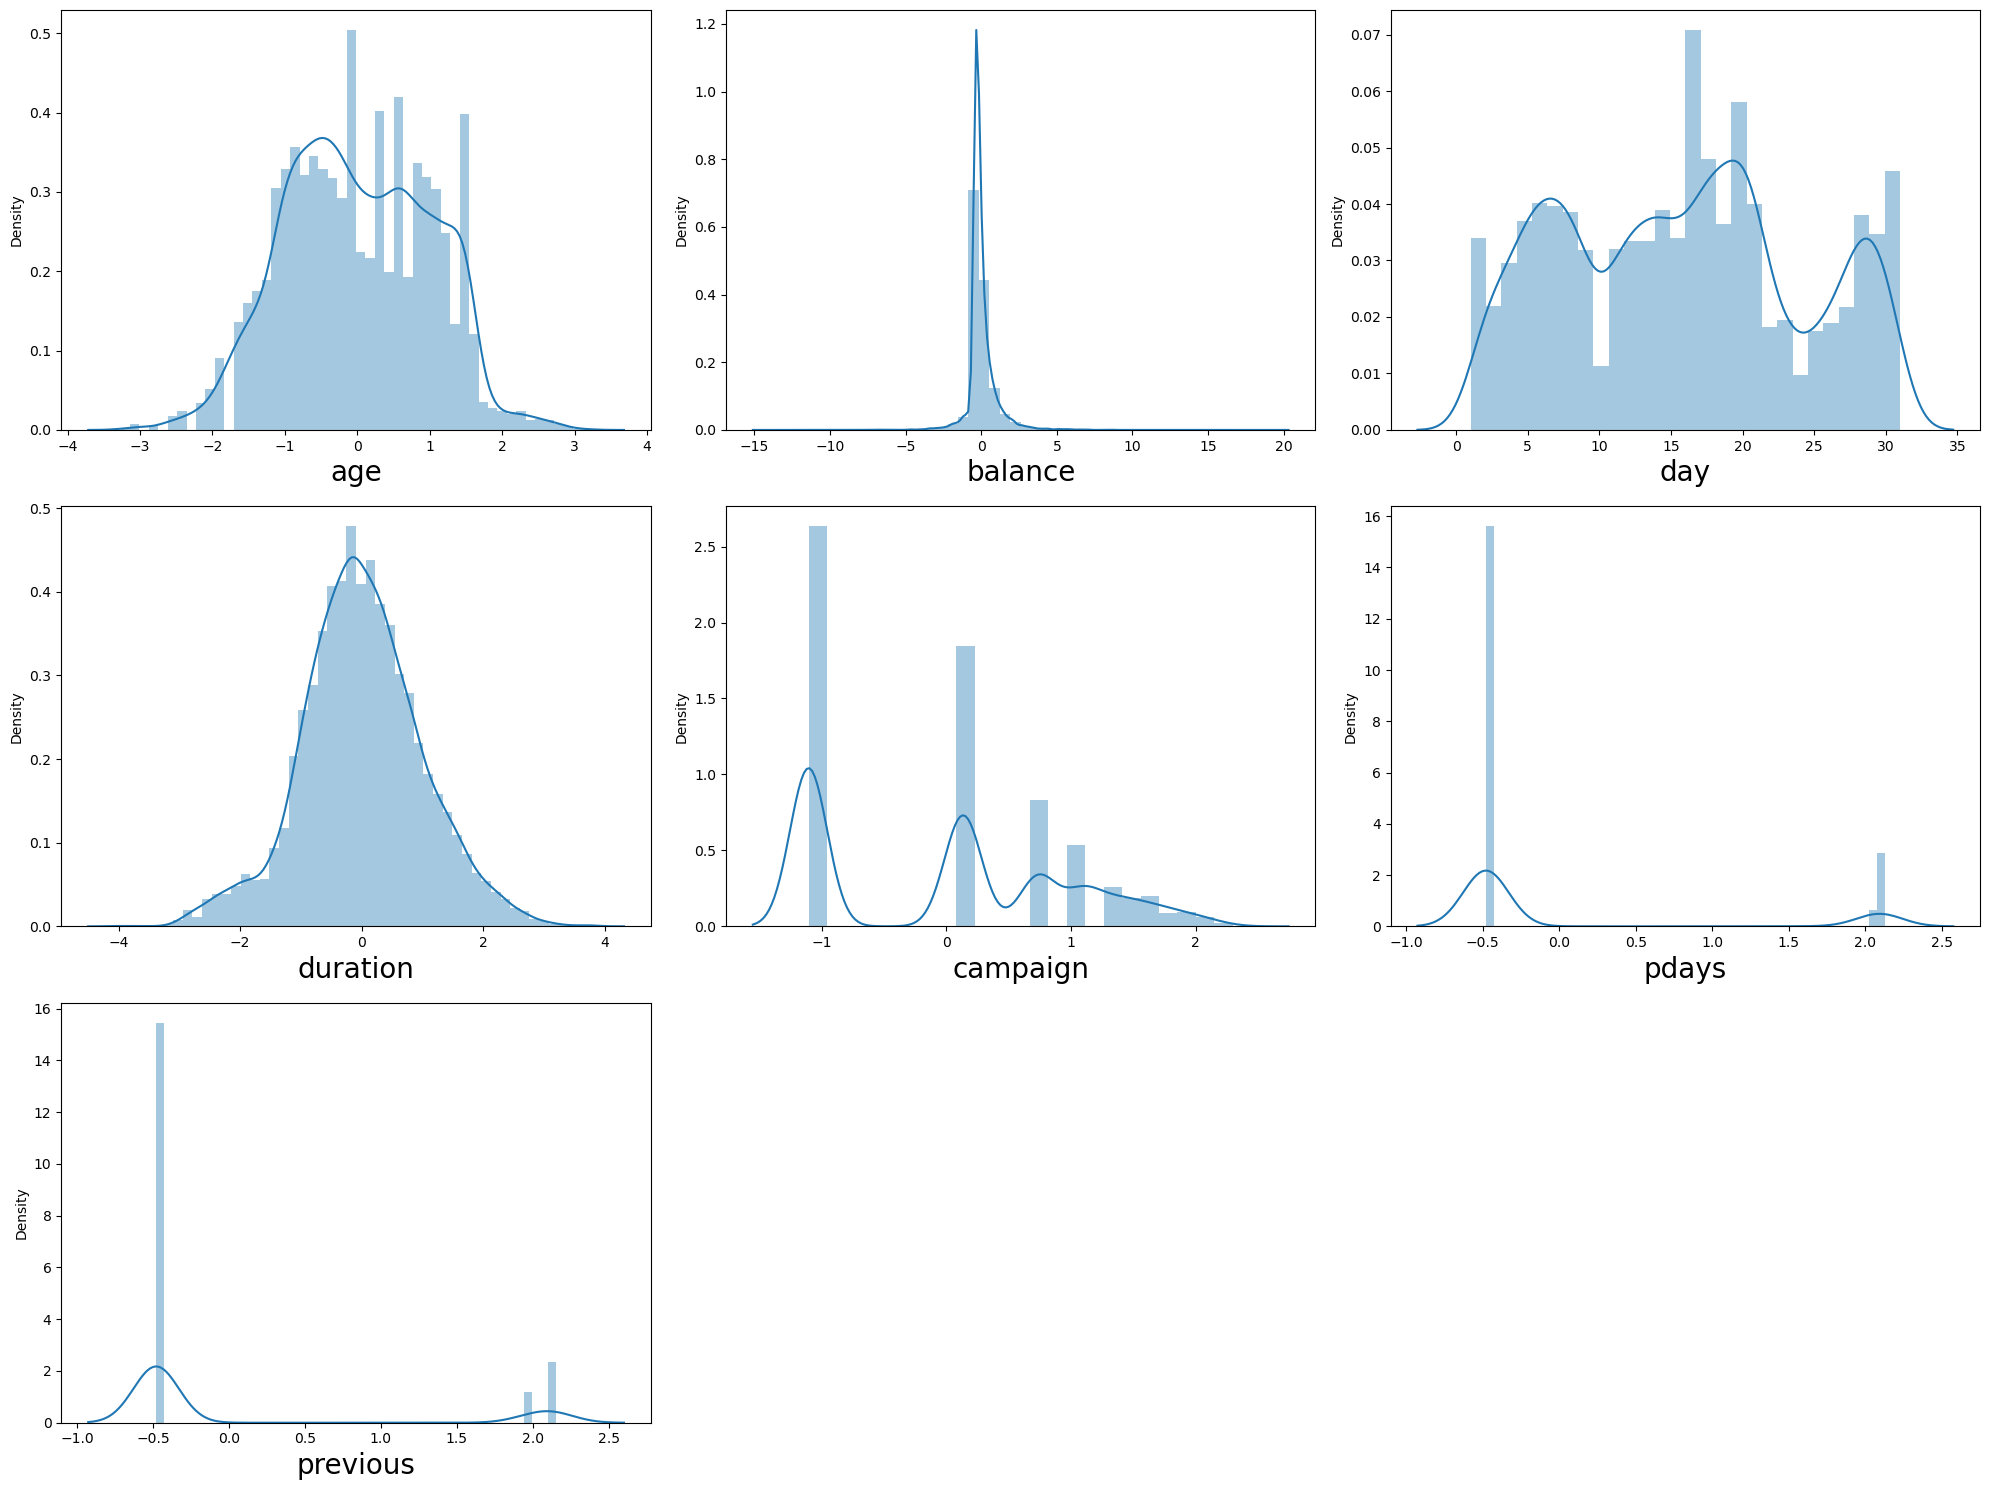

In [70]:
#lets see how data is distributed for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in test[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(test[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

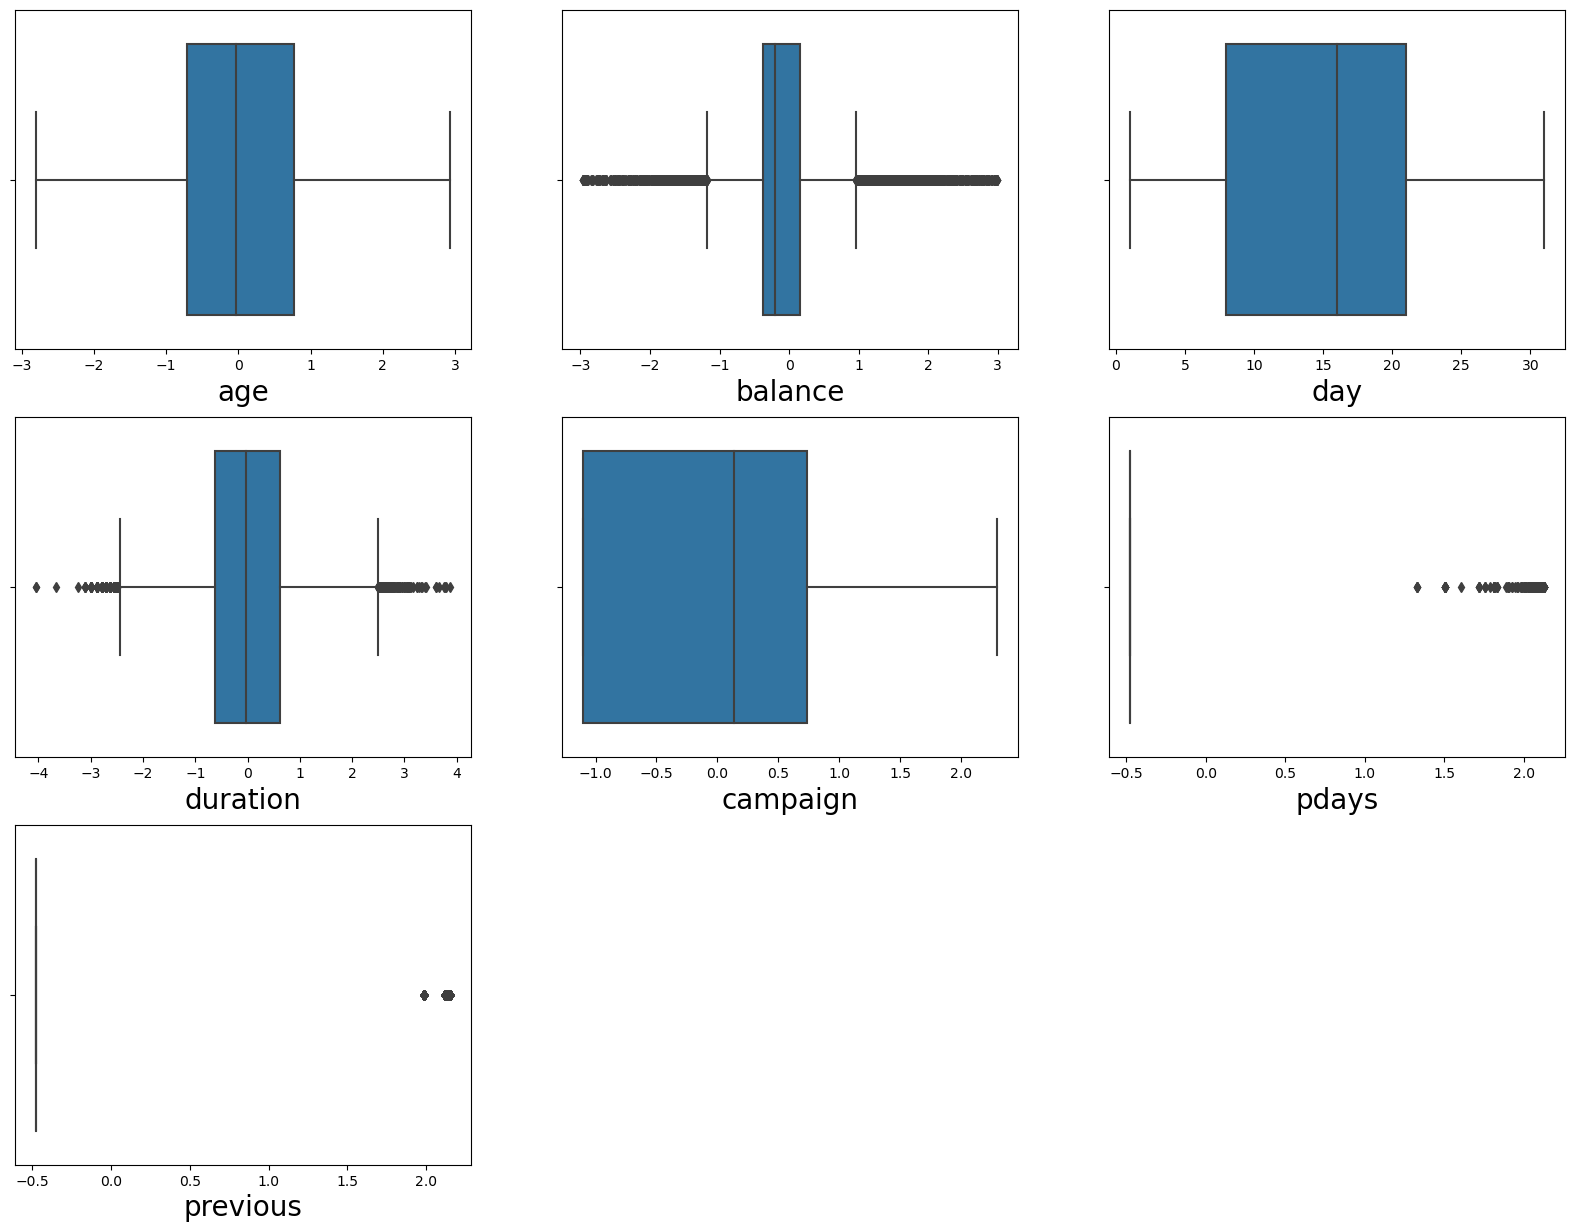

In [71]:
#lets build boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in testt[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(testt[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1   
plt.show()    

# Observation
Only pdays and previous have outliers left rest all columns dosen't have outliers

Now let's encode cat columns.

In [72]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [73]:
for col in testt.columns:
    if testt[col].dtype == object:
        label = LabelEncoder()
        testt[col] = label.fit_transform(testt[col])

In [74]:
testt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13272 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        13272 non-null  float64
 1   job        13272 non-null  int32  
 2   marital    13272 non-null  int32  
 3   education  13272 non-null  int32  
 4   default    13272 non-null  int32  
 5   balance    13272 non-null  float64
 6   housing    13272 non-null  int32  
 7   loan       13272 non-null  int32  
 8   contact    13272 non-null  int32  
 9   day        13272 non-null  int64  
 10  month      13272 non-null  int32  
 11  duration   13272 non-null  float64
 12  campaign   13272 non-null  float64
 13  pdays      13272 non-null  float64
 14  previous   13272 non-null  float64
 15  poutcome   13272 non-null  int32  
dtypes: float64(6), int32(9), int64(1)
memory usage: 1.3 MB


# Observation
Our cat columns are encoded 

Now let's check for corelation

In [75]:
corrr=testt.corr()
corrr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.032688,-0.421653,-0.120048,-0.019617,0.104265,-0.165503,-0.018281,0.031127,-0.007235,-0.049264,-0.013038,0.032661,-0.002253,-0.001591,0.007297
job,-0.032688,1.000000,0.051479,0.161087,-0.013380,0.027525,-0.126267,-0.019090,-0.090338,0.026978,-0.101292,0.010468,0.018677,-0.007162,-0.006436,0.019935
marital,-0.421653,0.051479,1.000000,0.113719,-0.003561,0.011981,-0.008551,-0.058314,-0.036726,0.003250,-0.015808,0.003416,-0.017950,0.017881,0.017784,-0.010938
education,-0.120048,0.161087,0.113719,1.000000,-0.022180,0.059558,-0.080067,-0.053617,-0.109056,0.032898,-0.061628,-0.000318,0.005955,0.031037,0.031957,-0.020733
default,-0.019617,-0.013380,-0.003561,-0.022180,1.000000,-0.143370,0.001700,0.060149,0.017250,0.002813,0.024721,-0.006058,0.012353,-0.037680,-0.037729,0.033071
balance,0.104265,0.027525,0.011981,0.059558,-0.143370,1.000000,-0.095837,-0.131095,-0.046328,0.009200,-0.000075,0.031149,-0.019223,0.062251,0.062717,-0.046659
housing,-0.165503,-0.126267,-0.008551,-0.080067,0.001700,-0.095837,1.000000,0.049667,0.170745,-0.036679,0.274043,0.003869,-0.040292,0.086343,0.084041,-0.118024
loan,-0.018281,-0.019090,-0.058314,-0.053617,0.060149,-0.131095,0.049667,1.000000,-0.015198,0.001277,0.020593,-0.012359,-0.002787,-0.035733,-0.035785,0.022543
contact,0.031127,-0.090338,-0.036726,-0.109056,0.017250,-0.046328,0.170745,-0.015198,1.000000,-0.030051,0.359108,-0.054039,0.001411,-0.288952,-0.288582,0.273773
day,-0.007235,0.026978,0.003250,0.032898,0.002813,0.009200,-0.036679,0.001277,-0.030051,1.000000,-0.020562,-0.046693,0.153883,-0.102715,-0.102334,0.097886


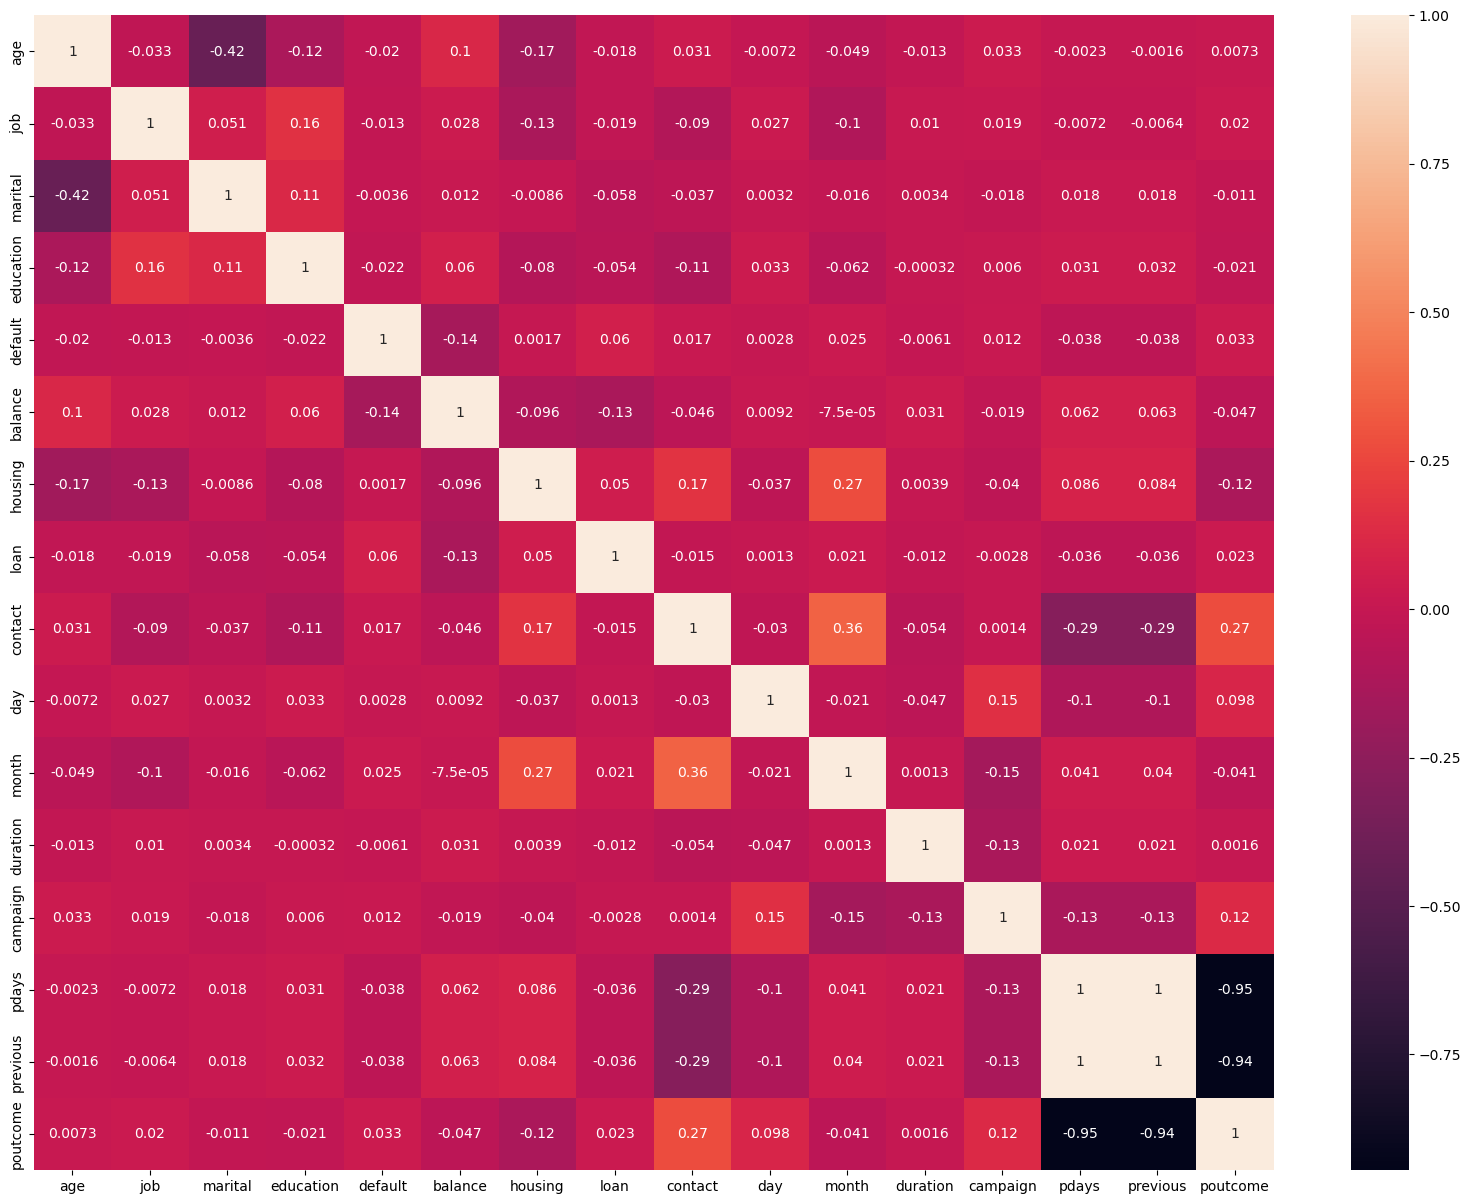

In [76]:
#let's plot heatmap for visualisation purpose
plt.figure(figsize=(20,15))
sns.heatmap(corrr,annot=True)
plt.show()

# Observation
1.pdays and poutcome ,previous and poutcome are highly in negative corelation.

2.month and housing,month and contact,contact andpoutcome are positively corelated.

3.previous and pdays are 100%corelated so we can delete one of them .

We can visualize other relations as well.


In [77]:
testt.drop('pdays',axis=1,inplace=True)
testt.shape


(13272, 15)

In [78]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(testt,i) for i in range(testt.shape[1])]
vif['features']= testt.columns
#let's check for value
vif

,vif,features
0,1.266298,age
1,2.850494,job
2,5.461840,marital
3,3.827330,education
4,1.041381,default
5,1.068311,balance
6,2.536629,housing
7,1.211554,loan
8,1.991500,contact
9,4.568406,day


# Observation
value of poutcome is greater than 10 it means there is multicollinearity issue,so let's delete it

In [79]:
testt.drop('poutcome',axis=1,inplace=True)
testt.shape

(13272, 14)

In [80]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(testt,i) for i in range(testt.shape[1])]
vif['features']= testt.columns
#let's check for value
vif

,vif,features
0,1.164818,age
1,2.633584,job
2,4.324579,marital
3,3.445891,education
4,1.040985,default
5,1.067565,balance
6,2.464138,housing
7,1.197692,loan
8,1.983729,contact
9,3.873932,day


In [81]:
#now let's standarize our data
testtt=scale.fit_transform(testt)
testtt

array([[-0.83482249,  0.8104616 , -0.27625136, ..., -2.05984315,
         1.48508339, -0.47961313],
       [ 2.56551629,  0.19997626, -1.91304065, ...,  0.80089963,
        -1.10522407, -0.47961313],
       [-0.96497423,  0.50521893,  1.36053793, ...,  1.55359571,
        -1.10522407, -0.47961313],
       ...,
       [-0.47077574,  0.19997626, -0.27625136, ..., -0.32936187,
        -1.10522407, -0.47961313],
       [-1.24035979, -1.32623707,  1.36053793, ...,  0.12780903,
         0.13386727,  2.13883325],
       [-1.24035979, -1.32623707, -0.27625136, ...,  0.68952174,
        -1.10522407,  1.98215247]])

# Modelling

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
#lets split data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=75)

In [84]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [85]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(testtt)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(testtt)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [86]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [87]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======


ValueError: Found input variables with inconsistent numbers of samples: [40983, 13272]